## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Loading the data
wafer_df = pd.read_csv('wafer_23012020_041211.csv')
print(f'Shape of wafer dataset is {wafer_df.shape}')
wafer_df.head()

Shape of wafer dataset is (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
wafer_df = wafer_df.rename(columns={'Unnamed: 0':'wafer'})

In [4]:
wafer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sensor-1,99.0,3017.301212,71.819707,2825.6700,2973.040000,3004.39000,3070.385000,3221.2100
Sensor-2,100.0,2487.180300,66.954212,2254.9900,2446.595000,2493.89000,2527.525000,2664.5200
Sensor-3,97.0,2202.168281,30.350606,2114.6667,2189.966700,2200.98890,2213.211100,2315.2667
Sensor-4,97.0,1484.362181,460.985871,978.7832,1111.543600,1244.28990,1963.801600,2363.6412
Sensor-5,97.0,1.180367,0.349654,0.7531,0.837300,1.15690,1.383000,2.2073
...,...,...,...,...,...,...,...,...
Sensor-587,100.0,0.023510,0.011991,0.0099,0.013400,0.02180,0.028025,0.0545
Sensor-588,100.0,0.014875,0.007557,0.0048,0.009475,0.01390,0.019200,0.0401
Sensor-589,100.0,0.004685,0.002527,0.0017,0.002700,0.00385,0.005900,0.0150
Sensor-590,100.0,77.430241,55.106166,20.3091,33.787600,62.05950,104.303400,223.1018


In [5]:
## Splitting the data into test and train
from sklearn.model_selection import train_test_split
wafer,wafer_test = train_test_split(wafer_df,test_size=0.2,random_state=42)

In [6]:
wafer.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [7]:
wafer.head(n=4)

,wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1


In [8]:
wafer_test.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,20.000000,20.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,20.000000,20.000000,...,7.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,3010.400500,2459.666000,2199.743274,1340.247374,1.094095,100.0,99.780579,0.122347,1.467230,-0.002570,...,115.011514,0.498980,0.012455,0.003380,2.496075,0.023380,0.017755,0.005670,98.684285,-1.0
std,69.750453,55.148847,24.987536,391.465609,0.263900,0.0,5.195252,0.001802,0.069249,0.009239,...,55.812169,0.002173,0.003079,0.000710,0.619655,0.013532,0.008207,0.003086,67.162768,0.0
min,2825.670000,2286.090000,2127.955500,1011.192400,0.753100,100.0,86.382200,0.119900,1.348700,-0.027900,...,39.622400,0.494800,0.008600,0.002600,1.728600,0.011700,0.005400,0.002000,24.654700,-1.0
25%,2967.845000,2440.562500,2192.905550,1069.587100,0.813600,100.0,98.784450,0.120950,1.398450,-0.007950,...,97.450500,0.497475,0.010175,0.002875,2.038725,0.013175,0.013450,0.003750,38.163700,-1.0
50%,3005.515000,2472.535000,2200.988900,1173.837700,1.112700,100.0,100.463300,0.122400,1.491650,-0.002200,...,104.303400,0.498900,0.011850,0.003150,2.379150,0.021450,0.018400,0.005400,91.985450,-1.0
75%,3071.940000,2496.000000,2215.333350,1506.926250,1.291900,100.0,101.561650,0.123350,1.519400,0.003275,...,121.576000,0.500475,0.013975,0.003600,2.803400,0.023575,0.020350,0.006450,140.530400,-1.0
max,3123.020000,2517.500000,2240.866600,2120.576000,1.639200,100.0,107.152200,0.126100,1.579400,0.010200,...,223.101800,0.503500,0.021700,0.005300,4.358700,0.054500,0.040100,0.015000,223.101800,-1.0


In [9]:
wafer['Good/Bad'].value_counts()

-1    74
 1     6
Name: Good/Bad, dtype: int64

In [10]:
wafer.iloc[[74]]

,wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
20,Wafer-821,3215.87,2453.97,2212.8667,1066.9539,0.8161,100.0,101.6156,0.1203,1.3964,...,NaN,0.4999,0.0122,0.0037,2.4437,0.0364,0.0172,0.0063,47.2136,-1


## Insights
### Data is heavily imbalanced and we need to upample it for class 1.

# Checking for Missing data

In [11]:
wafer['Good/Bad'].isna().sum()

0

# No missing data in target columns

In [12]:
wafer['Good/Bad']

55   -1
88   -1
26   -1
42   -1
69   -1
     ..
60   -1
71   -1
14   -1
92   -1
51   -1
Name: Good/Bad, Length: 80, dtype: int64

In [13]:
wafer.isna().sum().sum()/(wafer.shape[0]*wafer.shape[1]-1)

0.03847209611689436

# out of total data points we have around 4 percent missing values

# Viusalizing sensor data

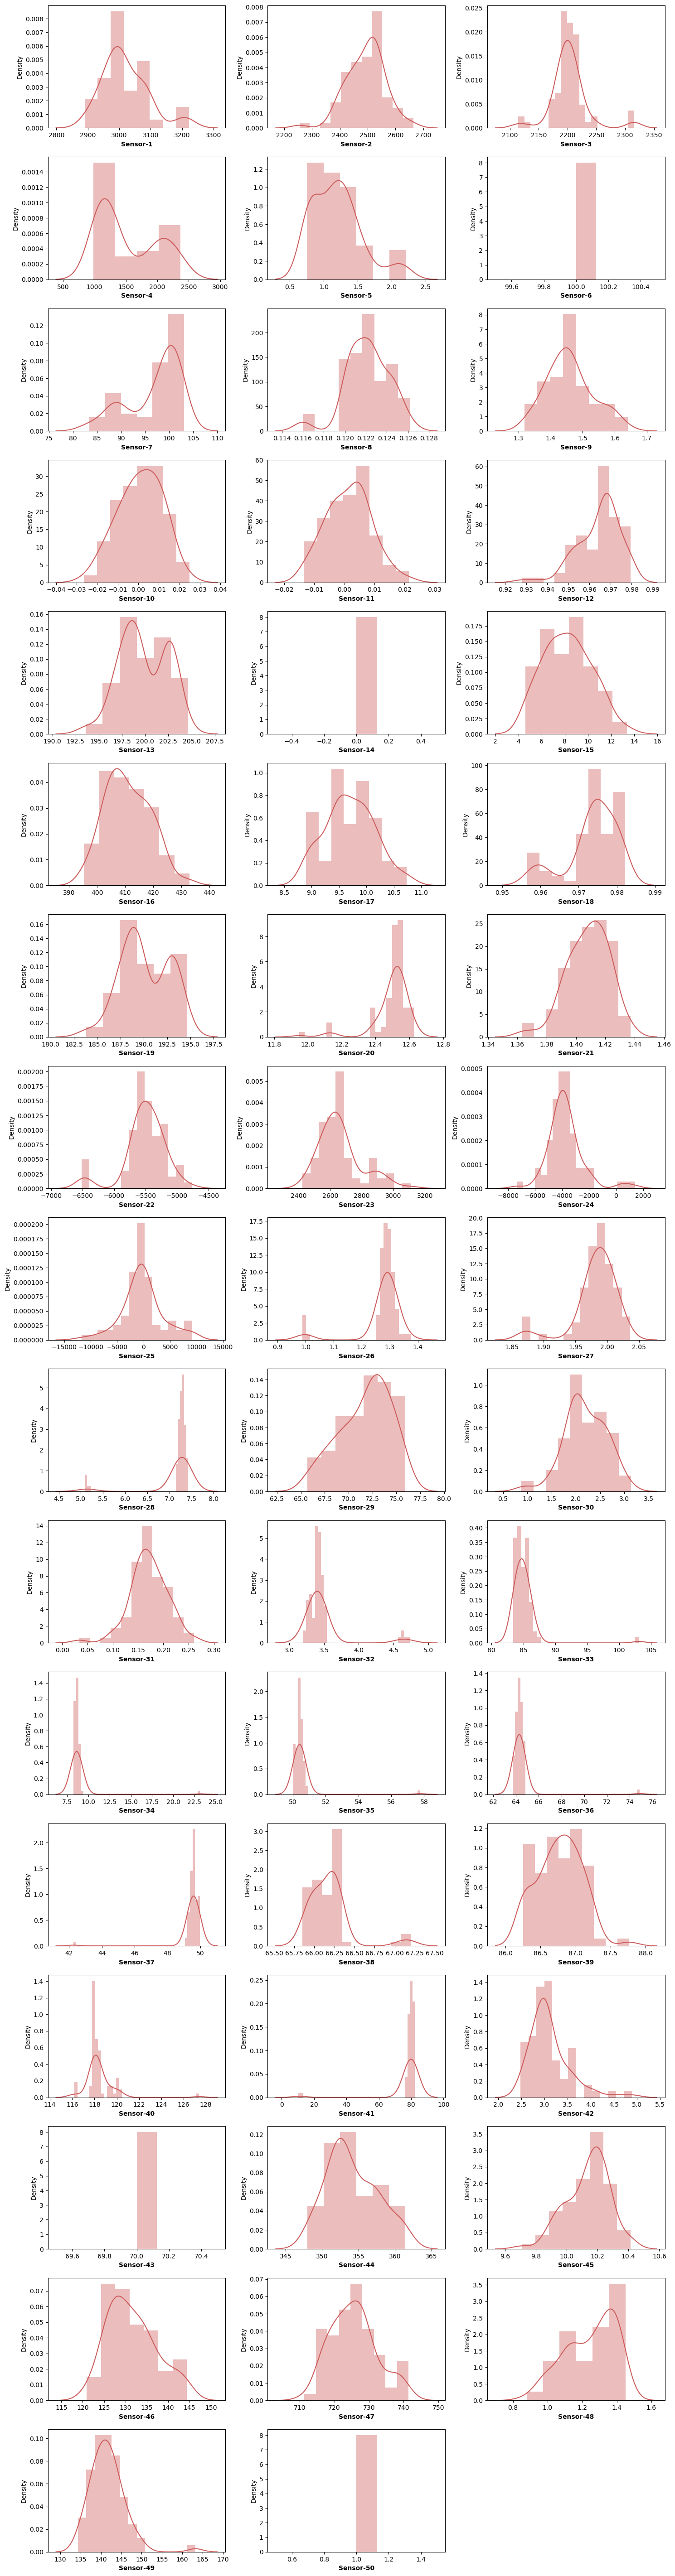

In [38]:
plt.figure(figsize=(15,100))
for i,col in enumerate(wafer.columns[1:51]):
    plt.subplot(30,3,i+1)
    sns.distplot(x=wafer[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [39]:
## Getting 50 random sensor index
random50sensor = []
for i in range(50):
    if i not in random50sensor:
        random50sensor.append(np.random.randint(1,591))

In [40]:
wafer.shape

(80, 592)

In [ ]:
# let's now, have a look at the distribution of random 50 sensors

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafer.columns[random50sensor]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafer[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

## Creating function to drop redundant data

In [14]:
miss_col =wafer.isna().sum().div(wafer.shape[0])
list(miss_col[miss_col > 0.70].index)

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [15]:
def get_cols_with_zero_std(df: pd.DataFrame)-> list:
    """
    Returns a list of columns names having zero standard deviation
    """
    cols_to_drop=[]
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    for col in num_cols:
        if df[col].std() ==0:
            cols_to_drop.append(col)
    return cols_to_drop
def get_redundant_cols(df: pd.DataFrame,missing_threshold=0.7)->list:
    """
    Return a list of columns with missing value higher than threshold
    """
    col_missing_ratios =df.isna().sum().div(df.shape[0])
    cols_to_drop = list(col_missing_ratios[col_missing_ratios>missing_threshold].index)
    return cols_to_drop

In [16]:
cols_to_drop1  = get_cols_with_zero_std(wafer)
cols_to_drop2 = get_redundant_cols(wafer)

In [17]:
cols_to_drop2.append("wafer")

In [18]:
cols_to_drop = cols_to_drop1+cols_to_drop2

In [19]:
# Sepreating features and targets
X,y = wafer.drop(cols_to_drop,axis='columns'),wafer[['Good/Bad']]

In [20]:
X.shape

(80, 465)

In [21]:
y.shape

(80, 1)

In [22]:
y.head()

,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


## Data Transformation

In [23]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
imputer=KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[
        ('Imputer',imputer),
        ('Scaler',RobustScaler())
          ]
)
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [24]:
X_trans=preprocessing_pipeline.fit_transform(X)
X_trans.shape

(80, 465)

In [25]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

In [28]:
@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [29]:
cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 7157148.928067336
WCSS for n_clusters=2: 2060306.163427788
WCSS for n_clusters=3: 1075227.480090585
WCSS for n_clusters=4: 524755.6688687303
WCSS for n_clusters=5: 313453.1212190196
WCSS for n_clusters=6: 265314.78769569116
WCSS for n_clusters=7: 217123.2159769103
WCSS for n_clusters=8: 181392.73715878802
WCSS for n_clusters=9: 141274.46242833775
WCSS for n_clusters=10: 108703.08733901894
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  2.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]])

In [30]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 12.4 MB/s eta 0:00:00


In [33]:
from imblearn.combine import SMOTETomek
X,y= X_trans[:,:-1],y
resampler = SMOTETomek(sampling_strategy='auto')
X_res, y_res = resampler.fit_resample(X, y)

In [35]:
print(f'The shape before resampling {np.c_[X,y].shape}')
print(f'The shape after resampling is {np.c_[X_res,y_res].shape}')

The shape before resampling (80, 465)
The shape after resampling is (148, 465)


In [41]:
print(f'The amount of data for class 1 is {len(y_res[y_res ==1])} and class -1 is {len(y_res[y_res==-1])}')

The amount of data for class 1 is 148 and class -1 is 148


## Preparing the train and test dataset

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=1/3,random_state=42)
print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((98, 464), (98, 1))
test set: ((50, 464), (50, 1))


In [45]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 11.9 MB/s eta 0:00:0000:0100:01


In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [47]:
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
rf_clf = RandomForestClassifier(random_state=42)
xgb_classfier = XGBClassifier(objective='binary:logistic')

In [48]:
## A function to display Scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [49]:
svc_scores = cross_val_score(svc_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [50]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [51]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test, y_test, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test, svc_preds)
svc_auc

0.94

In [52]:
svc_rbf_scores = cross_val_score(svc_rbf_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [53]:
display_scores(svc_rbf_scores)

Scores:  [1.   0.92 1.   0.84 1.   1.   0.96 0.88 1.   1.  ]
Mean:  0.96
Standard Deviation:  0.05656854249492381


In [56]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test, y_test, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test, svc_rbf_preds)
svc_rbf_auc

0.6799999999999999

In [59]:
random_clf_scores = cross_val_score(rf_clf,X_train, y_train, scoring='roc_auc', cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished


In [60]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [61]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(rf_clf, X_test, y_test, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test, random_clf_preds)
random_clf_auc

1.0

In [65]:
# xgb_clf_pred = cross_val_score(xgb_classfier,X_train,y_train,scoring='roc_auc',cv=10,verbose=2)

In [ ]:
display_scores(svc_rbf_scores)